<a href="https://colab.research.google.com/github/justinking22/AI-Application-System/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

#Load training dataset into a single batch.
transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10 (root='. /pt_data', train=True, download=True, transform=transform)
trainloader = DataLoader (trainset, batch_size=len(trainset), shuffle=False)
data = next(iter (trainloader))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting . /pt_data/cifar-10-python.tar.gz to . /pt_data


In [8]:
# Convert to numpy arrays of correct shape for plotting.
train_images = data[0].numpy()
train_images = np.moveaxis (train_images, 1, 3)
train_labels = data[1]. numpy()

Category: 8


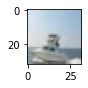

In [14]:
print('Category:', train_labels[100])
plt.figure(figsize=(1,1))
plt.imshow(train_images[100])
plt. show()

In [15]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r= requests.get(url)
# make sure your filename is the same as how you want to import
with open('utilities.py', 'w') as f:
   f.write(r.text)

In [33]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
from utilities import train_model

device = torch.device ("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 128
BATCH_SIZE = 32
# Load training dataset into a single batch to compute mean and stddev.
transform = transforms.Compose([transforms. ToTensor()])
trainset = CIFAR10(root= './pt_data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data = next(iter(trainloader))
mean = data[0].mean()
stddev = data[0].std()

Files already downloaded and verified


In [37]:
# Load and standardize training and test dataset.
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean, stddev)])

trainset = CIFAR10(root='. /pt_data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./pt_data', train=False, download=True, transform=transform)

# Model with 2 convolutional and 1 fully-connected layer.
model = nn.Sequential(
    nn. Conv2d(3, 64, 5, stride=2, padding=2), # Output is 64x16x16.
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, stride=2, padding=1), # Output is 64x8x8.
    nn.ReLU(),
    nn.Flatten(),
    nn. Linear (64 * 8 * 8, 10)
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Retrieve layers for custom weight initialization.
layers = next(model. modules())
conv_layer0 = layers[0]
conv_layer1 = layers[2]
output_layer = layers[5]

#Kaiming (He) initialization.
nn.init.kaiming_normal_(conv_layer0.weight)
nn.init.constant_(conv_layer0.bias, 0.0)
nn.init.kaiming_normal_(conv_layer1.weight)
nn.init.constant_(conv_layer1.bias,0.0)

# Xavier (Glorot) initialization.
nn.init.xavier_uniform_(output_layer.weight)
nn.init.constant_(output_layer.bias, 0.0)

# Loss function and optimizer
optimizer=torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

# Train the model.
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function,'acc')

Epoch 1/128 loss: 1.4080 - acc: 0.5055 - val_loss: 1.1872 - val_acc: 0.5794
Epoch 2/128 loss: 1.0716 - acc: 0.6267 - val_loss: 1.0648 - val_acc: 0.6284
Epoch 3/128 loss: 0.9252 - acc: 0.6802 - val_loss: 1.0593 - val_acc: 0.6363
Epoch 4/128 loss: 0.8215 - acc: 0.7157 - val_loss: 1.0683 - val_acc: 0.6405
Epoch 5/128 loss: 0.7439 - acc: 0.7416 - val_loss: 1.0616 - val_acc: 0.6547
Epoch 6/128 loss: 0.6696 - acc: 0.7679 - val_loss: 1.1164 - val_acc: 0.6415
Epoch 7/128 loss: 0.6092 - acc: 0.7864 - val_loss: 1.1538 - val_acc: 0.6393
Epoch 8/128 loss: 0.5549 - acc: 0.8060 - val_loss: 1.2148 - val_acc: 0.6338
Epoch 9/128 loss: 0.5055 - acc: 0.8225 - val_loss: 1.2900 - val_acc: 0.6326
Epoch 10/128 loss: 0.4604 - acc: 0.8379 - val_loss: 1.3285 - val_acc: 0.6271
Epoch 11/128 loss: 0.4263 - acc: 0.8472 - val_loss: 1.4386 - val_acc: 0.6360
Epoch 12/128 loss: 0.3955 - acc: 0.8611 - val_loss: 1.4648 - val_acc: 0.6378
Epoch 13/128 loss: 0.3625 - acc: 0.8692 - val_loss: 1.5863 - val_acc: 0.6264
Epoch 14